In [ ]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 20;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 10
cphl = CPHL.CPHLSolver(N_sites, g_vals);

In [47]:
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)
CPHL.OptimizeCPDMRG(cphl);

In [48]:
for i in 1:20
    CPHL.LearnHarmonics(cphl)

    @save "DATA/ALPHAMat_$(N_sites).jld2" ALPHAMat = copy(cphl.ALPHAMat)
    if cphl.flag_convergence
        println("Converged")
        break
    end
end

Current error = 0.11213270946713211; λ weight = 1.0; δ step = 0.2; max|C| = 0.030708274910581042
Current error = 0.10570749400152722; λ weight = 0.8333333333333334; δ step = 0.2; max|C| = 0.059627948628115046
Current error = 0.09920777549202603; λ weight = 0.7142857142857143; δ step = 0.2; max|C| = 0.08673230857277842
Current error = 0.09283803633269787; λ weight = 0.625; δ step = 0.2; max|C| = 0.11205424848345426
Current error = 0.0867147620358244; λ weight = 0.5555555555555556; δ step = 0.2; max|C| = 0.13566051047648703
Current error = 0.08089869090567102; λ weight = 0.5; δ step = 0.2; max|C| = 0.15763542817999757
Current error = 0.07541599868809727; λ weight = 0.45454545454545453; δ step = 0.2; max|C| = 0.17807087663535276
Current error = 0.0702719954410121; λ weight = 0.41666666666666663; δ step = 0.2; max|C| = 0.19706021922557615
Current error = 0.06545988432890198; λ weight = 0.3846153846153846; δ step = 0.2; max|C| = 0.21469480218846235
Current error = 0.06096630761459643; λ wei

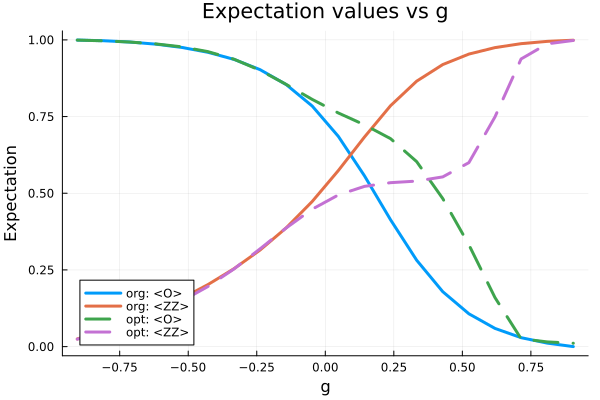

In [49]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)

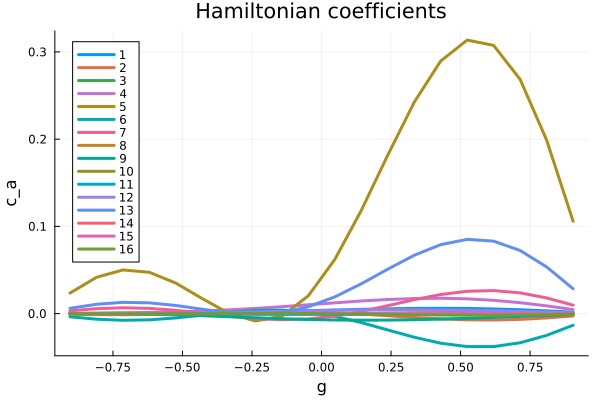

In [50]:
l = plot(cphl.g_vals, cphl.CMat[:, 1], label="$(1)", title="Hamiltonian coefficients", xlabel="g", ylabel="c_a", linewidth=3);
for idx in 2:cphl.N_op
    plot!(l, cphl.g_vals, cphl.CMat[:, idx], label="$(idx)", linewidth=3)
end

display(l)